# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

%matplotlib inline

觀察資料分布, 發現 2(Petal Length) 和 3(Petal Width) 在不同種之間的差異比較明顯, 所以採取 2, 3, 0 來作圖

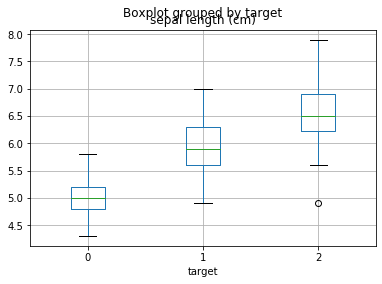

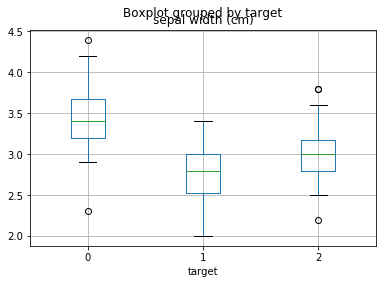

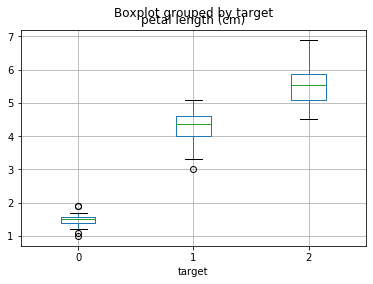

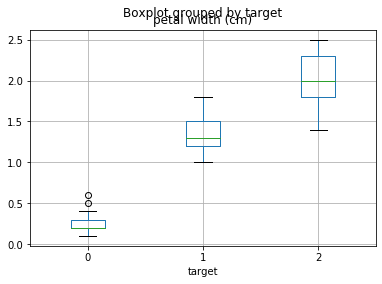

In [3]:
import pandas as pd
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_name = iris.target_names
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y
data
for column in feature_names:
    data.boxplot(by='target', column=column)
    print()

In [4]:
estimators = [('k_means_7', KMeans(n_clusters=7)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

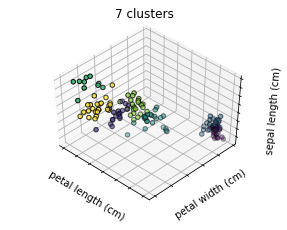

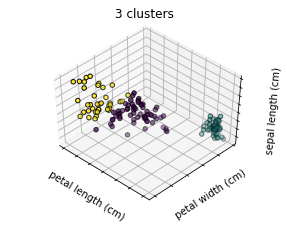

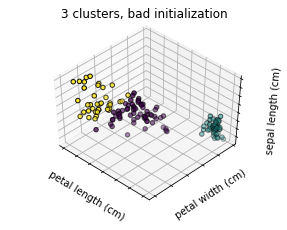

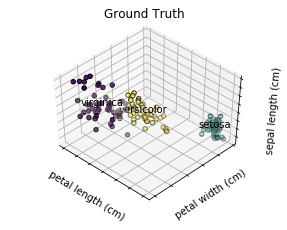

In [5]:
axis1, axis2, axis3 = [2, 3, 0]

fignum = 1
titles = ['7 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, axis1], X[:, axis2], X[:, axis3],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(feature_names[axis1])
    ax.set_ylabel(feature_names[axis2])
    ax.set_zlabel(feature_names[axis3])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in zip(target_name, range(3)):
    ax.text3D(X[y == label, axis1].mean(),
              X[y == label, axis2].mean(),
              X[y == label, axis3].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
Y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, axis1], X[:, axis2], X[:, axis3], c=Y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(feature_names[axis1])
ax.set_ylabel(feature_names[axis2])
ax.set_zlabel(feature_names[axis3])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()